# EDA for the Heart dieases Classification

In [23]:
# Importing the required Libraries and setting a nicer style for plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.dpi': 120})

In [3]:
data = pd.read_csv("../data/raw/heart.csv")
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Anylsis of data (Pre-EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Visual Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14108\181377778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='coolwarm')


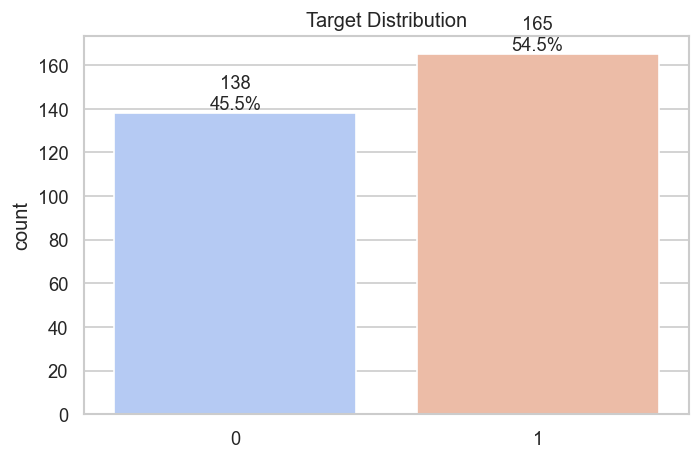

In [24]:
# Improved target countplot with percentages and cleaner styling
plt.figure(figsize=(6,4))
ax = sns.countplot(x='target', data=df, palette='coolwarm')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height / total * 100
    ax.annotate(f'{int(height)}\n{pct:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)
ax.set_title('Target Distribution')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

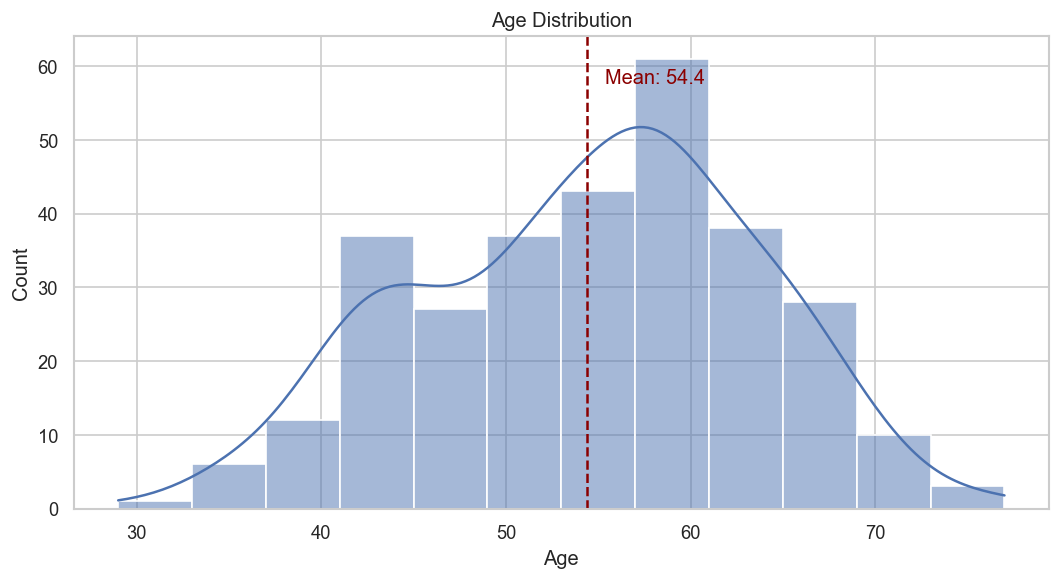

In [25]:
# Smoothed age distribution with KDE and mean annotation
plt.figure(figsize=(9,5))
ax = sns.histplot(data=df, x='age', bins=12, kde=True, color='#4C72B0')
mean_age = df['age'].mean()
ax.axvline(mean_age, color='darkred', linestyle='--', linewidth=1.5)
ax.annotate(f'Mean: {mean_age:.1f}', xy=(mean_age, ax.get_ylim()[1]*0.9), xytext=(mean_age+1, ax.get_ylim()[1]*0.9),
            color='darkred')
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

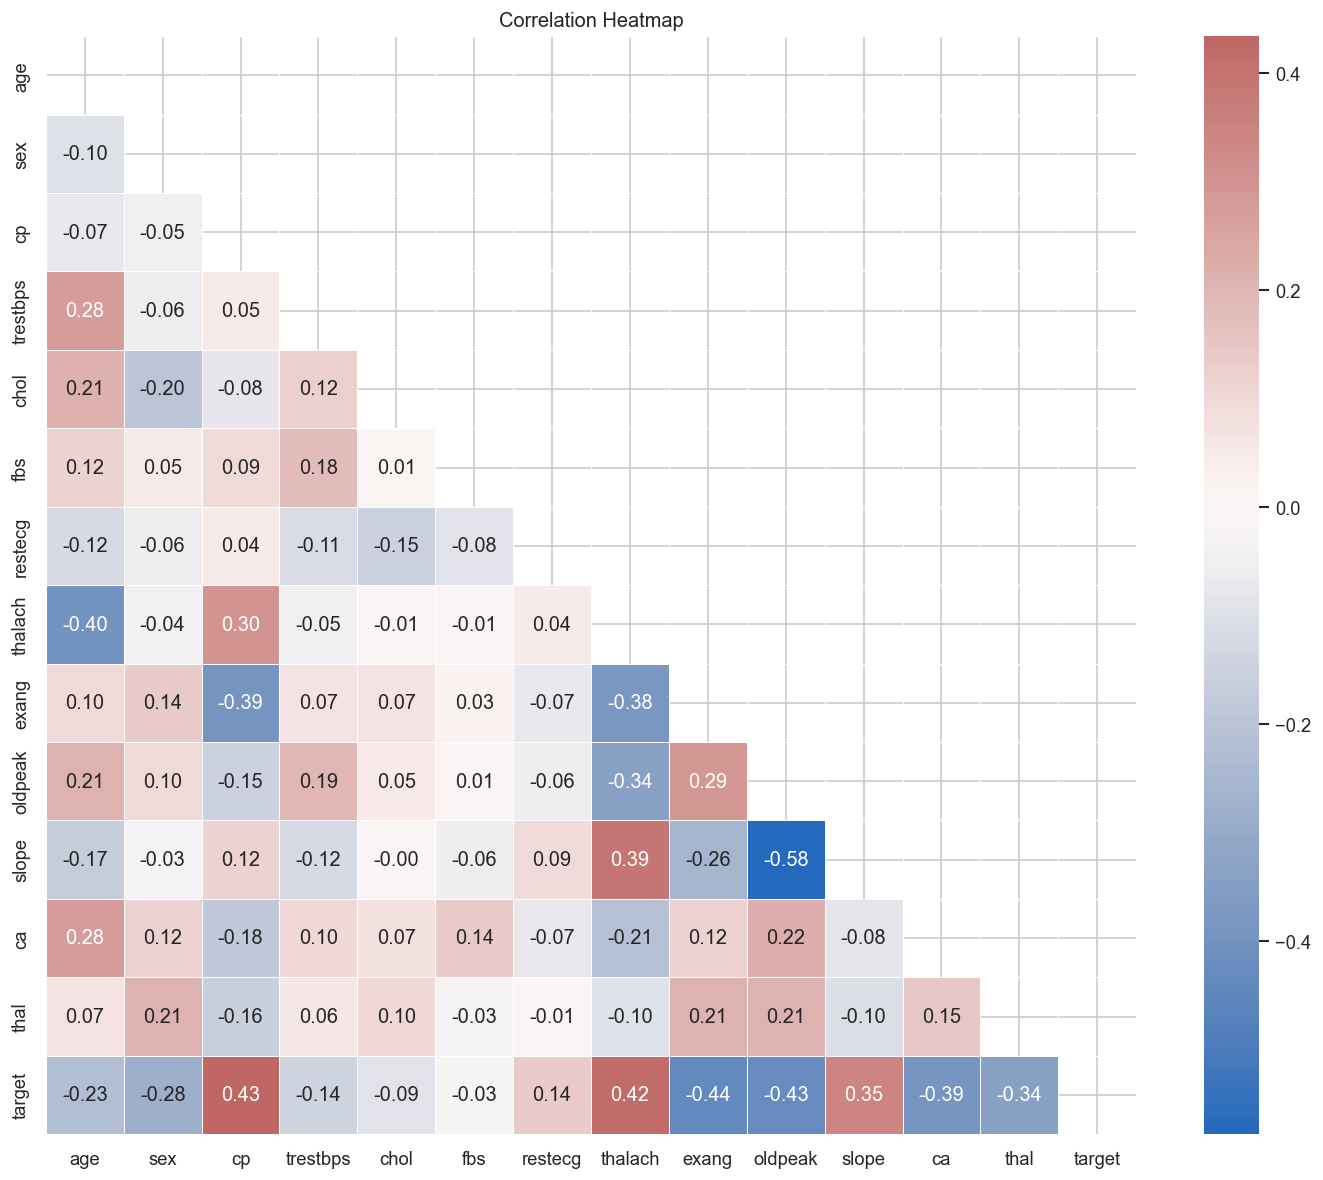

In [26]:
# Correlation heatmap with upper-triangle mask and divergent colormap
plt.figure(figsize=(12,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='vlag', center=0, linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

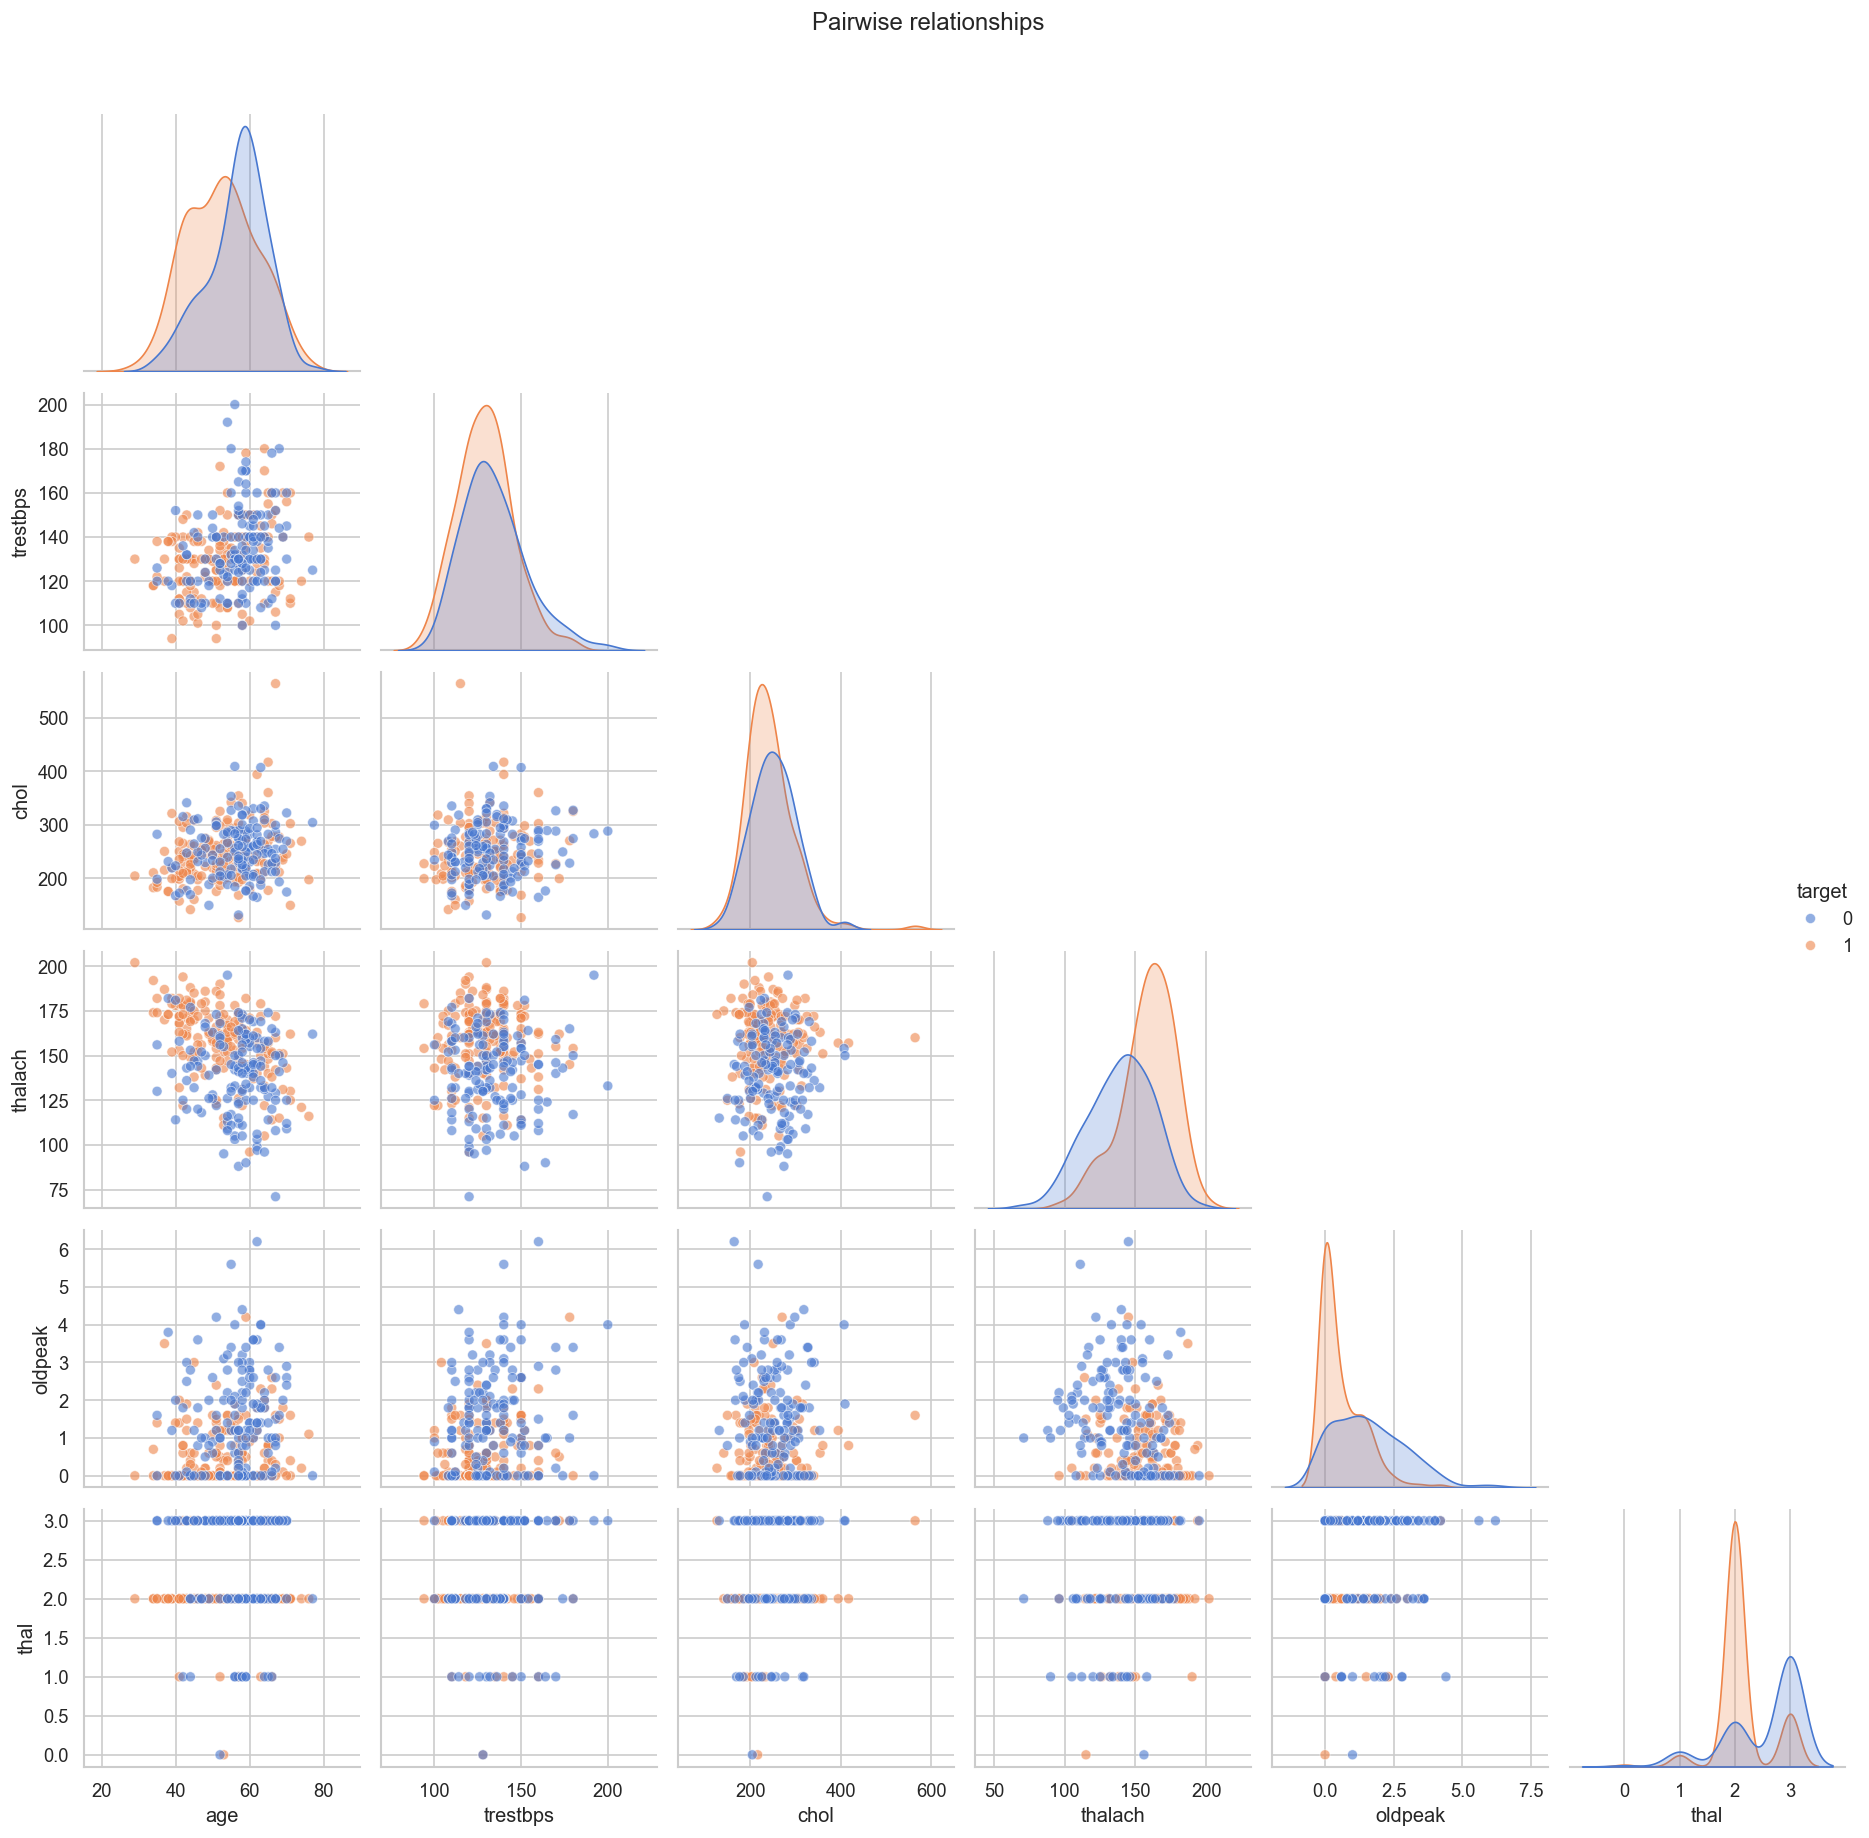

In [27]:
# Pairwise relationships for a selected subset of numeric features
vars = ['age','trestbps','chol','thalach','oldpeak','thal']
g = sns.pairplot(df[vars + ['target']], vars=vars, hue='target', corner=True, plot_kws={'alpha':0.6}, diag_kind='kde')
g.fig.suptitle('Pairwise relationships', y=1.02)
plt.tight_layout()
plt.show()

## EDA Summary

**Dataset:** Loaded from `data/raw/heart.csv`. Basic checks (head, info, describe, shape, nulls) were performed.

**Missing values:** `df.isnull().sum()` and `df.isna()` were run; no missing-value handling is shown (dataset appears complete).

**Target balance:** The target class distribution is visualized with counts and percentages to assess balance before modeling.

**Univariate insights:** Key numeric features (e.g., `age`) are shown with smoothed histograms (KDE) and mean annotations to expose skew, spread, and obvious outliers.

**Correlation structure:** A masked correlation heatmap (upper triangle removed) with a divergent colormap highlights positive and negative relationships; useful to detect multicollinearity.

**Pairwise relationships:** A curated pairplot for selected numeric features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `thal`) shows how target classes separate across feature pairs.

**Visual improvements applied:** Seaborn `whitegrid` theme, higher DPI for crisper figures, annotated countplot (counts + %), KDE-enhanced histograms with mean lines, masked heatmap with `vlag` palette, and focused pairplot.

**High-level findings:**
- Some features show clearer separation by target in pairwise views — promising for predictive models.
- Correlation clusters indicate groups of related features; consider multicollinearity when using linear models.
- If class imbalance is non-trivial, use stratified evaluation or class-weighting / resampling.
